### Overview 

In [1]:
import pandas as pd


df_alldata = pd.read_csv('momo_reviews_scrape.csv')

df_alldata

,Tên phim,Người đánh giá,Điểm,Nhãn cảm xúc,Nội dung đánh giá,Tags cảm xúc
0,Review phim Quật Mộ Trùng Ma (chiếu lại) trên ...,Vũ Nguyên Ngọc Thư,10/10,· Cực phẩm!,"phim thì quá xuất sắc đối với cá nhân mình, gh...",NaN
1,Review phim Quật Mộ Trùng Ma (chiếu lại) trên ...,Trần Bảo Châu,10/10,· Cực phẩm!,mình nghĩ mọi ng nên đi xem phim này lúc đầu x...,NaN
2,Review phim Quật Mộ Trùng Ma (chiếu lại) trên ...,Pham Thi Bich Ngoc,7/10,· Đáng xem,Phim hay nếu hiểu biết về bối cảnh lịch sử giữ...,NaN
3,Review phim Quật Mộ Trùng Ma (chiếu lại) trên ...,Lưu Phương Mai,10/10,· Cực phẩm!,"Phải nói là đỉnh luôn á, phim có nói về lịch s...",NaN
4,Review phim Quật Mộ Trùng Ma (chiếu lại) trên ...,Phùng Yến Nhi,8/10,· Đáng xem,Các cảnh phim chủ yếu màu tối. Mỗi hình ảnh ph...,NaN
...,...,...,...,...,...,...
6010,Review phim Nhà Gia Tiên trên MoMo,Đinh Xuân Thanh Phong,10/10,· Cực phẩm!,Jdjdjdjdjdjdjdjdjdjdjdjffjfjjffjfjfjfjjfjffjjf...,NaN
6011,Review phim Nhà Gia Tiên trên MoMo,Trần Thúy Ngọc,10/10,· Cực phẩm!,Nhà Gia Tiên không chỉ đáng sợ mà còn đầy cảm ...,NaN
6012,Review phim Nhà Gia Tiên trên MoMo,Phan Văn Dũng,10/10,· Cực phẩm!,"phim hay 100₫ ko có nhưng, nhân văn hài hước h...",NaN
6013,Review phim Nhà Gia Tiên trên MoMo,Trần Minh Châu,8/10,· Đáng xem,Phim hay ý nghĩa nhma tui thấy cái phần hiệu ứ...,NaN


In [11]:
df_alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6015 entries, 0 to 6014
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tên phim           6015 non-null   object 
 1   Người đánh giá     6015 non-null   object 
 2   Điểm               5997 non-null   object 
 3   Nhãn cảm xúc       5997 non-null   object 
 4   Nội dung đánh giá  5856 non-null   object 
 5   Tags cảm xúc       0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 282.1+ KB


In [12]:
df_alldata['Nhãn cảm xúc'].value_counts()

Nhãn cảm xúc
· Cực phẩm!       4388
· Đáng xem         908
· Tạm ổn           339
· Kén người mê     226
· Chưa ưng lắm     136
Name: count, dtype: int64

In [13]:
df_alldata['Điểm'].unique()

array(['10/10', '7/10', '8/10', '6/10', '9/10', '4/10', '5/10', '3/10',
       '2/10', '1/10', nan], dtype=object)

In [8]:
df_alldata['Điểm'].value_counts()

Điểm
10/10    3663
9/10      725
8/10      615
7/10      293
6/10      193
1/10      158
5/10      146
4/10       73
2/10       68
3/10       63
Name: count, dtype: int64

In [18]:
# Tổng số giá trị null theo cột
df_alldata.isnull().sum()

# Tỉ lệ % null từng cột (nếu cần)
(df_alldata.isnull().sum() / len(df_alldata)) * 100


Tên phim               0.000000
Người đánh giá         0.000000
Điểm                   0.299252
Nhãn cảm xúc           0.299252
Nội dung đánh giá      2.643392
Tags cảm xúc         100.000000
dtype: float64

### Clean

In [2]:
import pandas as pd
import re
from unidecode import unidecode

In [96]:
# Đọc dữ liệu gốc
df = pd.read_csv("momo_reviews_scrape.csv")

In [97]:
# Xóa cột Tags cảm xúc
if "Tags cảm xúc" in df.columns:
    df = df.drop(columns=["Tags cảm xúc"])
    print("Đã xoá cột 'Tags cảm xúc'")


Đã xoá cột 'Tags cảm xúc'


In [98]:
# Hiển thị số dòng gốc
print("Số dòng ban đầu:", len(df))

# Loại bỏ dòng bị thiếu nội dung đánh giá
df = df.dropna(subset=["Nội dung đánh giá"])

# Xoá dòng trùng lặp
df = df.drop_duplicates()

# Kiểm tra lại sau làm sạch bước 1
print("Sau khi loại null và trùng lặp:", len(df))


Số dòng ban đầu: 6015
Sau khi loại null và trùng lặp: 5844


In [99]:
# Làm sạch cột "Nhãn cảm xúc": bỏ dấu chấm và khoảng trắng đầu
df["Nhãn cảm xúc"] = df["Nhãn cảm xúc"].str.strip().str.lstrip("·. ").str.strip()

# Kiểm tra sau làm sạch
print(df["Nhãn cảm xúc"].unique())

['Cực phẩm!' 'Đáng xem' 'Tạm ổn' 'Chưa ưng lắm' 'Kén người mê' nan]


In [100]:
# Loại bỏ các dòng có giá trị null hoặc chuỗi rỗng trong cột "Nhãn cảm xúc"
df = df.dropna(subset=["Nhãn cảm xúc"])  # bỏ nếu là NaN
df = df[df["Nhãn cảm xúc"].str.strip() != ""]  # bỏ nếu là chuỗi trắng

# Kiểm tra số dòng còn lại
print("Số dòng còn lại sau khi xoá nhãn rỗng:", len(df)) # -18 dòng null

Số dòng còn lại sau khi xoá nhãn rỗng: 5826


In [101]:
# Từ điển viết tắt / teen code
replacement_dict = {
    "siu": "siêu", "iu": "yêu", "thik": "thích", "hok": "không", "k": "không",
    "ko": "không", "cx": "cũng", "mik": "mình", "mk": "mình", "ms": "mới",
    "cmt": "bình luận", "z": "rồi", "nghĩ": "nghĩa", "jk": "giỡn"
}

# Từ điển từ hợp lệ cơ bản
vi_dict = {
    "hay", "siêu", "phim", "coi", "xem", "thích", "yêu", "nội dung", "mình",
    "nghĩa", "đáng", "quá", "cảm động", "hài", "buồn", "kịch tính", "đỉnh", "nha", "xuất sắc"
}


In [46]:
# def clean_review(text):
#     if not isinstance(text, str):
#         return ""

#     # Viết thường + chuẩn hoá Unicode
#     text = text.lower()
#     text = unidecode(text)

#     # Bỏ emoji, ký tự đặc biệt
#     text = re.sub(r'[^\w\sàáạảãâầấậẩẫăằắặẳẵèéẹẻẽêềếệểễìíịỉĩòóọỏõôồốộổỗơờớợởỡùúụủũưừứựửữỳýỵỷỹđ]', ' ', text)

#     # Tách từ và xử lí
#     words = text.strip().split()
#     cleaned_words = []

#     for word in words:
#         # Giảm lặp ký tự: "xemmmmm" → "xem"
#         word = re.sub(r'(.)\1{2,}', r'\1', word)
#         # Thay viết tắt nếu có
#         word = replacement_dict.get(word, word)
#         if len(word) > 1 or word in {'á', 'ơ'}:
#             cleaned_words.append(word)

#     # Loại nếu quá ngắn
#     if len(cleaned_words) < 3:
#         return ""

#     # Loại nếu từ hợp lệ quá ít
#     # valid = [w for w in cleaned_words if w in vi_dict]
#     # if len(valid) < max(1, len(cleaned_words) * 0.3):
#     #     return ""

#     return ' '.join(cleaned_words)


In [102]:
def clean_review_no_accent(text):
    if not isinstance(text, str):
        return ""

    text = text.lower()
    text = unidecode(text)

    text = re.sub(r'[^\w\s]', ' ', text)
    words = text.strip().split()
    cleaned_words = []

    for word in words:
        word = re.sub(r'(.)\1{2,}', r'\1', word)
        word = replacement_dict.get(word, word)
        if len(word) > 1 or word in {'a', 'o'}:
            cleaned_words.append(word)

    if len(cleaned_words) < 3:
        return ""

    return ' '.join(cleaned_words)


In [103]:
def clean_review_with_accent(text):
    if not isinstance(text, str):
        return ""

    text = text.lower()

    text = re.sub(r'[^\w\sàáạảãâầấậẩẫăằắặẳẵèéẹẻẽêềếệểễìíịỉĩòóọỏõôồốộổỗơờớợởỡ'
                  r'ùúụủũưừứựửữỳýỵỷỹđ]', ' ', text)

    words = text.strip().split()
    cleaned_words = []

    for word in words:
        word = re.sub(r'(.)\1{2,}', r'\1', word)
        word = replacement_dict.get(word, word)
        if len(word) > 1 or word in {'á', 'ơ'}:
            cleaned_words.append(word)

    if len(cleaned_words) < 3:
        return ""

    return ' '.join(cleaned_words)


In [104]:
# Tạo cột mới chứa nội dung đã làm sạch
#df["Noi_dung_sach"] = df["Nội dung đánh giá"].apply(clean_review)

# Áp dụng hàm làm sạch không dấu
df["Noi_dung_sach"] = df["Nội dung đánh giá"].apply(clean_review_no_accent)

# Áp dụng hàm làm sạch giữ dấu
df["Noi_dung_sach_giu_dau"] = df["Nội dung đánh giá"].apply(clean_review_with_accent)

# Kiểm tra số dòng còn lại sau làm sạch
print("Sau khi làm sạch văn bản:", len(df))

Sau khi làm sạch văn bản: 5826


In [105]:
# Xoá dòng trống sau xử lí
df = df[df["Noi_dung_sach"].str.strip() != ""]
df = df[df["Noi_dung_sach_giu_dau"].str.strip() != ""]

# Kiểm tra lần cuối
print("Sau khi loại dòng rỗng:", len(df))

Sau khi loại dòng rỗng: 5452


In [106]:
df.to_csv("momo_reviews_final_clean.csv", index=False, encoding="utf-8-sig")
print("File đã lưu: momo_reviews_final_clean.csv")

File đã lưu: momo_reviews_final_clean.csv


In [107]:
df_cleaned = pd.read_csv("momo_reviews_final_clean.csv")

In [93]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5452 entries, 0 to 5451
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Tên phim               5452 non-null   object
 1   Người đánh giá         5452 non-null   object
 2   Điểm                   5452 non-null   object
 3   Nhãn cảm xúc           5452 non-null   object
 4   Nội dung đánh giá      5452 non-null   object
 5   Noi_dung_sach          5452 non-null   object
 6   Noi_dung_sach_giu_dau  5452 non-null   object
dtypes: object(7)
memory usage: 298.3+ KB


In [109]:
df_cleaned.sample(5)

,Tên phim,Người đánh giá,Điểm,Nhãn cảm xúc,Nội dung đánh giá,Noi_dung_sach,Noi_dung_sach_giu_dau
3090,Review phim Tee Yod: Quỷ Ăn Tạng Phần 2 trên MoMo,Lê Thị Minh Ánh,9/10,Cực phẩm!,"Phim sợ vãi ò nha các bạn , mạch phim khá kịch...",phim so vai o nha cac ban mach phim kha kich t...,phim sợ vãi nha các bạn mạch phim khá kịch tín...
3400,Review phim Đẹp Trai Thấy Sai Sai trên MoMo,Dau Thi My Linh,10/10,Cực phẩm!,Phim hay nên xem nhé,phim hay nen xem nhe,phim hay nên xem nhé
3413,Review phim Cưới Ma Giải Hạn trên MoMo,Huỳnh Hiếu Nghĩa,10/10,Cực phẩm!,Phim hay và rất hài,phim hay va rat hai,phim hay và rất hài
4618,Review phim CÁM trên MoMo,Nguyễn Thế Thìn,5/10,Tạm ổn,Kịch bản lỏng. Cái vòng cổ giúp quỷ không động...,kich ban long cai vong co giup quy khong dong ...,kịch bản lỏng cái vòng cổ giúp quỷ không động ...
2045,Review phim Những Mảnh Ghép Cảm Xúc 2 trên MoMo,Pham Khanh Ngan,10/10,Cực phẩm!,10 điểm luôn phim vẫn giữ phong độ vl k bị đi ...,10 diem luon phim van giu phong do vl không bi...,10 điểm luôn phim vẫn giữ phong độ vl không bị...


In [110]:
df_cleaned['Nhãn cảm xúc'].value_counts()

Nhãn cảm xúc
Cực phẩm!       3960
Đáng xem         841
Tạm ổn           317
Kén người mê     209
Chưa ưng lắm     125
Name: count, dtype: int64

In [111]:
# Lọc 5 dòng ngẫu nhiên có nhãn cảm xúc là "Chưa ưng lắm"
sample_rows = df_cleaned[df_cleaned["Nhãn cảm xúc"] == "Chưa ưng lắm"].sample(n=5, random_state=42)

# Hiển thị
print(sample_rows[["Nội dung đánh giá", "Nhãn cảm xúc"]])


                                      Nội dung đánh giá  Nhãn cảm xúc
519   mấy anh lồng tiếng cứu vớt được phần nào. chứ ...  Chưa ưng lắm
2094  Không nói tới phần cốt truyện vì mình thấy tạm...  Chưa ưng lắm
1917  Nhạc phim tuy không phù hợp nhưng mà nội dung ...  Chưa ưng lắm
3317  Không có gì đặc sắc gây cấn, theo mình phim ở ...  Chưa ưng lắm
2504    Phim dở thiệt =))))) coi không đọng lại được gì  Chưa ưng lắm


### Label

In [4]:
import pandas as pd
df_labeled = pd.read_csv("momo_reviews_final_clean.csv")

In [5]:
# Hàm ánh xạ nhãn gốc sang nhóm cảm xúc chính
def map_emotion(label):
    if label in ["Cực phẩm!", "Đáng xem"]:
        return "Tích cực"
    elif label == "Tạm ổn":
        return "Trung lập"
    elif label in ["Chưa ưng lắm", "Kén người mê"]:
        return "Tiêu cực"
    else:
        return "Không xác định"  # nếu có nhãn ngoài danh sách

# Tạo cột mới: "Cảm xúc chuẩn"
df_labeled["label"] = df_labeled["Nhãn cảm xúc"].apply(map_emotion)

# Kiểm tra kết quả
print(df_labeled["label"].value_counts())


label
Tích cực     4801
Tiêu cực      334
Trung lập     317
Name: count, dtype: int64


In [7]:
df_labeled.to_csv("momo_reviews_labeled.csv", index=False, encoding="utf-8-sig")
print("Đã thêm cột 'label' và lưu file mới!")

Đã thêm cột 'label' và lưu file mới!


### Visualization

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

df_labeled = pd.read_csv("momo_reviews_labeled.csv")

In [3]:
df_labeled.sample(5)

,Tên phim,Người đánh giá,Điểm,Nhãn cảm xúc,Nội dung đánh giá,Noi_dung_sach,Noi_dung_sach_giu_dau,label
4463,Review MAI - Phim hay nhất của Trấn Thành tron...,Nguyễn Hữu Trọng,10/10,Cực phẩm!,"Phim hay, chất lượng phim tốt, dàn diễn viên q...",phim hay chat luong phim tot dan dien vien qua...,phim hay chất lượng phim tốt dàn diễn viên quá...,Tích cực
2009,Review phim Những Mảnh Ghép Cảm Xúc 2 trên MoMo,Trần Thị Linh Nhi,10/10,Cực phẩm!,rất nên xem nhất là với những bạn nữ sẽ dễ đồn...,rat nen xem nhat la voi nhung ban nu se de don...,rất nên xem nhất là với những bạn nữ sẽ dễ đồn...,Tích cực
1400,Review phim Vây Hãm: Kẻ Trừng Phạt trên MoMo,Nguyễn Minh Trang,10/10,Cực phẩm!,rất đáng xem nha mn ơi 💯💯💯💯💯💯,rat dang xem nha mn oi,rất đáng xem nha mn ơi,Tích cực
3036,Review phim Tee Yod: Quỷ Ăn Tạng Phần 2 trên MoMo,Lê Thị Mai Uyên,8/10,Đáng xem,"Phần 1 hù doạ và mảng miếng hài nhiều hơn, phầ...",phan hu doa va mang mieng hai nhieu hon phan n...,phần hù doạ và mảng miếng hài nhiều hơn phần n...,Tích cực
2939,Review phim Kung Fu Panda 4 trên MoMo,Trần Phong Thái,6/10,Tạm ổn,Mình thấy phim vẫn giữ vững tinh thần giải trí...,minh thay phim van giu vung tinh than giai tri...,mình thấy phim vẫn giữ vững tinh thần giải trí...,Trung lập


In [5]:
# Số lượng từng loại sentiment
df_labeled['label'].value_counts()

# Tỉ lệ phần trăm
df_labeled['label'].value_counts(normalize=True) * 100


label
Tích cực     88.059428
Tiêu cực      6.126192
Trung lập     5.814380
Name: proportion, dtype: float64

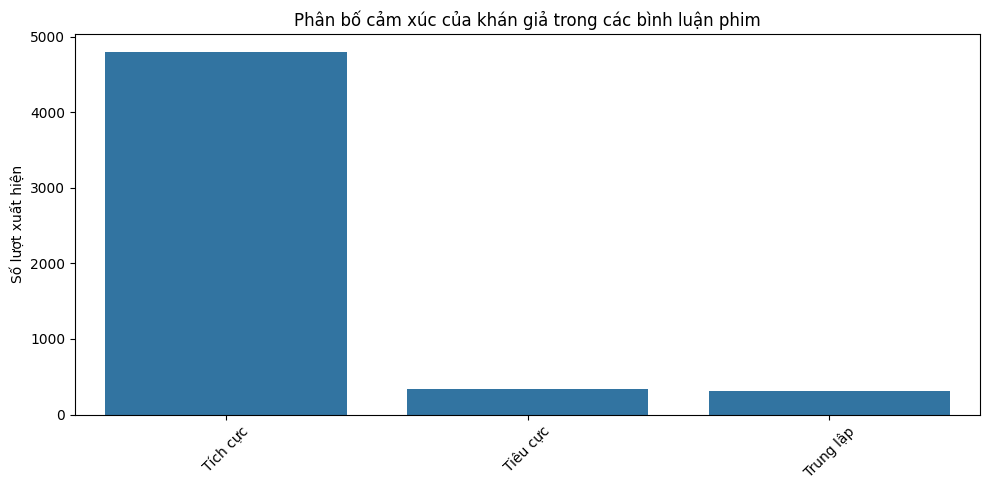

In [8]:

# --- BIỂU ĐỒ TAG CẢM XÚC PHỔ BIẾN ---

all_Sentiment =df_labeled['label'].dropna().str.split(', ')
flat_Sentiment = [tag for sublist in all_Sentiment for tag in sublist if tag]

# Đếm tần suất các tag
tag_counts = Counter(flat_Sentiment)

# Lấy top 10 tag cảm xúc phổ biến
top_Sentiment = dict(sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)[:10])

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
sns.barplot(x=list(top_Sentiment.keys()), y=list(top_Sentiment.values()))
plt.title("Phân bố cảm xúc của khán giả trong các bình luận phim")
plt.xticks(rotation=45)
plt.ylabel("Số lượt xuất hiện")
plt.tight_layout()
plt.show()
